In [21]:
# this is the code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.callbacks import Callback


In [22]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [23]:
batch_size = 128
num_classes = 10
epochs = 12

callback=myCallback()

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[callback])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12


23808/60000 [==========>...................] - ETA: 3:47 - loss: 2.2954 - accuracy: 0.10 - ETA: 2:49 - loss: 2.2643 - accuracy: 0.14 - ETA: 2:30 - loss: 2.2327 - accuracy: 0.19 - ETA: 2:20 - loss: 2.1902 - accuracy: 0.22 - ETA: 2:14 - loss: 2.1326 - accuracy: 0.25 - ETA: 2:10 - loss: 2.0860 - accuracy: 0.27 - ETA: 2:08 - loss: 2.0515 - accuracy: 0.27 - ETA: 2:07 - loss: 2.0365 - accuracy: 0.29 - ETA: 2:05 - loss: 1.9790 - accuracy: 0.32 - ETA: 2:03 - loss: 1.9108 - accuracy: 0.35 - ETA: 2:01 - loss: 1.8619 - accuracy: 0.37 - ETA: 2:02 - loss: 1.8419 - accuracy: 0.38 - ETA: 2:01 - loss: 1.7993 - accuracy: 0.40 - ETA: 1:59 - loss: 1.7399 - accuracy: 0.42 - ETA: 1:59 - loss: 1.6859 - accuracy: 0.44 - ETA: 1:59 - loss: 1.6477 - accuracy: 0.45 - ETA: 1:58 - loss: 1.6127 - accuracy: 0.46 - ETA: 1:57 - loss: 1.5792 - accuracy: 0.47 - ETA: 1:56 - loss: 1.5450 - accuracy: 0.49 - ETA: 1:55 - loss: 1.5088 - accuracy: 0.50 - ETA: 1:55 - loss: 1.4789 - accuracy: 0.51 - ETA: 1:54 - loss: 1.4563 - ac

60000/60000 [==============================] - ETA: 23s - loss: 0.2985 - accuracy: 0.908 - ETA: 23s - loss: 0.2980 - accuracy: 0.908 - ETA: 23s - loss: 0.2974 - accuracy: 0.908 - ETA: 22s - loss: 0.2971 - accuracy: 0.908 - ETA: 22s - loss: 0.2967 - accuracy: 0.908 - ETA: 22s - loss: 0.2964 - accuracy: 0.909 - ETA: 22s - loss: 0.2962 - accuracy: 0.909 - ETA: 21s - loss: 0.2955 - accuracy: 0.909 - ETA: 21s - loss: 0.2951 - accuracy: 0.909 - ETA: 21s - loss: 0.2945 - accuracy: 0.909 - ETA: 21s - loss: 0.2941 - accuracy: 0.909 - ETA: 20s - loss: 0.2936 - accuracy: 0.909 - ETA: 20s - loss: 0.2931 - accuracy: 0.910 - ETA: 20s - loss: 0.2927 - accuracy: 0.910 - ETA: 20s - loss: 0.2925 - accuracy: 0.910 - ETA: 19s - loss: 0.2921 - accuracy: 0.910 - ETA: 19s - loss: 0.2915 - accuracy: 0.910 - ETA: 19s - loss: 0.2910 - accuracy: 0.910 - ETA: 19s - loss: 0.2905 - accuracy: 0.910 - ETA: 18s - loss: 0.2900 - accuracy: 0.910 - ETA: 18s - loss: 0.2896 - accuracy: 0.911 - ETA: 18s - loss: 0.2891 - acc

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [20]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
 #e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[2:5])

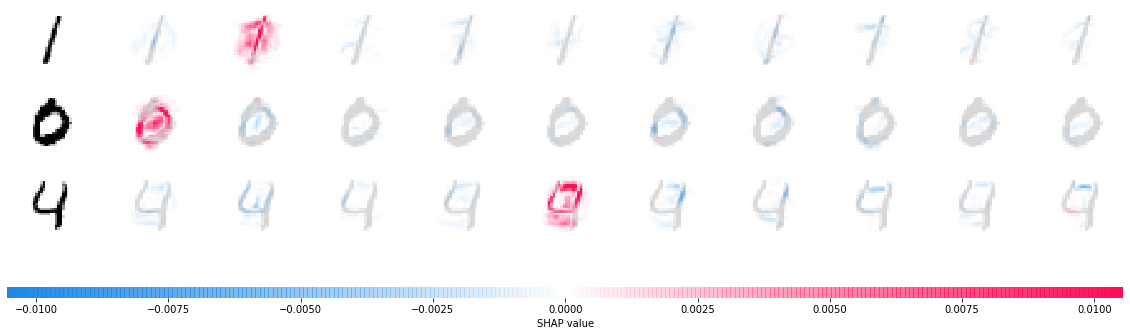

In [14]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[2:5])